* [18. future-directions_template(2023.09.04).ipynb] 의 주석파일. 같은 내용이다.

In [24]:
# 코랩이나 캐글을 사용한다면 이 셀의 주석을 제거하고 실행하세요.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
#install_requirements(chapter=11)

fatal: destination path 'nlp-with-transformers' already exists and is not an empty directory.
/content/nlp-with-transformers/nlp-with-transformers/nlp-with-transformers


# 향후 방향

## 트랜스포머 확장

In [25]:
model_data = [
    {'date': '12-06-2017', 'name': 'Transformer', 'size': 213*1e6},
    {'date': '11-06-2018', 'name': 'GPT', 'size': 110*1e6},
    {'date': '11-10-2018', 'name': 'BERT', 'size': 340*1e6},
    {'date': '14-02-2019', 'name': 'GPT-2', 'size': 1.5*1e9},
    {'date': '23-10-2019', 'name': 'T5', 'size': 11*1e9},
    {'date': '17-09-2019', 'name': 'Megatron', 'size': 8.3*1e9},
    {'date': '13-02-2020', 'name': 'Turing-NLG', 'size': 17*1e9},
    {'date': '30-06-2020', 'name': 'GShard', 'size': 600*1e9},
    {'date': '28-05-2020', 'name': 'GPT-3', 'size': 175*1e9},
    {'date': '11-01-2021', 'name': 'Switch-C', 'size': 1.571*10e12},
]

## 텍스트를 넘어서

### 비전

#### iGPT
- iGPT(이미지 GTP의 약자)
- iGPT는 이미지를 픽셀의 시퀀스로 보고 GPT 아키텍처와 자기회귀 사전 훈련 목표를 사용해 다음 픽셀값을 예측합니다.
- 대규모 이미지 데이터셋에서 사전 훈련해 아래 그림처럼 부분 이미지를 완성합니다.

<img alt="iGPT" width="800" caption="Examples of image completions with iGPT (courtesy of Mark Chen)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_iGPT.png?raw=1" id="iGPT"/>

#### ViT
- 비전을 위해 트랜스포머를 선택한 BERT 스타일 모델
- 먼저 이미지를 작은 패치로 나누구 각 패치를 선형 투영을 통해 임베딩 --> 이 결과는 BERT의 토큰 임베딩과 닮음
- 패치 임베딩을 위치 임베딩과 연결해 일반적인 트랜스포머 인코더로 주입합니다.
- 사전 훈련하는 동안 일부 패치가 마스킹되거나 왜곡되는데 목표는 마스킹된 패치의 평균 컬러를 예측
- ViT는 트랜스포머와 통합되어 NLP 파이프라인과 사용법이 비슷

<img alt="vit-architecture" width="800" caption="The ViT architecture (courtesy of Alexey Dosovitskiy et al.)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_vit-architecture.png?raw=1" id="vit-architecture"/>

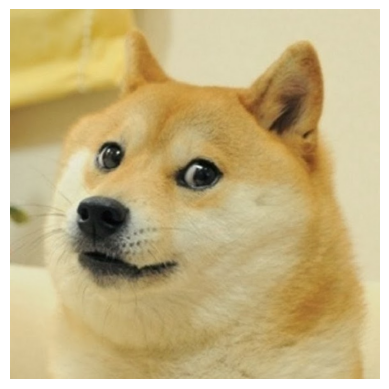

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("images/doge.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

- ViT모델을 로드하려면 image-classification 파이프라인을 지정하면 됩니다. 
- 그 다음 이미지를 주입해 예측 클래스를 추출합니다.

import pandas as pd
from transformers import pipeline

image_classifier = pipeline("image-classification")
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

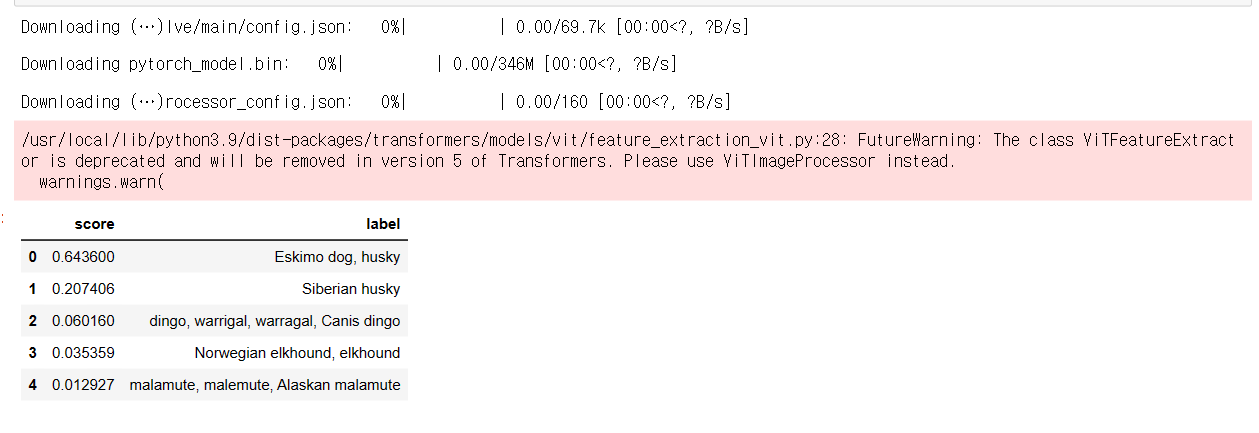

- 이미지 모델을 확장하면 자연스럽게 비디오 모델이 됩니다.
- TimeSformer 모델(https://huggingface.co/docs/transformers/main/model_doc/timesformer)

### 테이블
- 테이블 데이터에 대한 질문 답변

<img alt="table-qa" width="800" caption="Question answering over a table (courtesy of Jonathan Herzig)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_table-qa.png?raw=1" id="tapas-table"/>

<img alt="tapas-architecture" width="800" caption="Architecture of TAPAS (courtesy of Jonathan Herzig)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_tapas-architecture.png?raw=1" id="tapas-architecture"/>

**책 목차와 가상 버전을 만들면**
1. 장 번호, 장 이름, 각 장의 시작과 끝페이지 번호가 포함
2. TAPAS(Table Parser의 약자) 모델을 활용하려면 모든 열의 타입이 str이어야 합니다.

In [29]:
book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12,
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74,
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121,
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141,
     "end_page": 144}
]

In [30]:
table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page']
table = table.astype(str)
table

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,10
1,1,Text classification,12,48,36
2,2,Named Entity Recognition,49,73,24
3,3,Question Answering,74,120,46
4,4,Summarization,121,140,19
5,5,Conclusion,141,144,3


**table-question-answering** 파이프라인을 로드합니다.

In [31]:
table_qa = pipeline("table-question-answering")

No model was supplied, defaulted to google/tapas-base-finetuned-wtq and revision 69ceee2 (https://huggingface.co/google/tapas-base-finetuned-wtq).
Using a pipeline without specifying a model name and revision in production is not recommended.


**쿼리를 전달해 답변을 추출**합니다.

In [32]:
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?",
           "What is the total number of pages?",
           "On which page does the chapter about question-answering start?",
           "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

No model was supplied, defaulted to google/tapas-base-finetuned-wtq and revision 69ceee2 (https://huggingface.co/google/tapas-base-finetuned-wtq).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [33]:
for query, pred in zip(queries, preds):
    print(query)
    print("Predicted answer: " + pred["answer"])
    print('='*50)

What's the topic in chapter 4?
Predicted answer: Summarization
What is the total number of pages?
Predicted answer: SUM > 10, 36, 24, 46, 19, 3
On which page does the chapter about question-answering start?
Predicted answer: AVERAGE > 74
How many chapters have more than 20 pages?
Predicted answer: COUNT > 1, 2, 3


## 멀티모달 트랜스포머

<img alt="wav2vec2" width="800" caption="Architecture of wav2vec 2.0 (courtesy of Alexei Baevski)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_wav2vec2.png?raw=1" id="wav2vec2"/>

In [34]:
asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
from datasets import load_dataset

ds = load_dataset("superb", "asr", split="validation[:1]")
print(ds[0])

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/28539 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2703 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2620 [00:00<?, ? examples/s]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/3f10e98d93ce608a
c22fb2e825d2ce49a34482b4557f18c9c6f6106e31abe246/LibriSpeech/dev-clean/1272/1281
04/1272-128104-0000.flac', 'audio': {'path': '/root/.cache/huggingface/datasets/
downloads/extracted/3f10e98d93ce608ac22fb2e825d2ce49a34482b4557f18c9c6f6106e31ab
e246/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'array':
array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
       0.0010376 ]), 'sampling_rate': 16000}, 'text': 'MISTER QUILTER IS THE
APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL',
'speaker_id': 1272, 'chapter_id': 128104, 'id': '1272-128104-0000'}


- file 열에 오디오가 flac 코딩 포맷으로 저장됐고 text 열에 기대 출력 텍스트가 있습니다.
- 오디오를 실수 배열로 변환하기 위해 soundfile 라이브러리(https://oreil,ly/eo106)와 map() 메서드를 사용해 데이터셋에 있는 각 파일을 읽습니다.

In [36]:
import soundfile as sf

def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

ds = ds.map(map_to_array)

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [37]:
#주피터 노트북에서 Ipython 위젯으로 사운드 파일을 간단히 플레이 할 수 있습니다.
from IPython.display import Audio

display(Audio(ds[0]['speech'], rate=16000))

In [38]:
ds.set_format("numpy")

- 입력을 파이프라인에 전달하고 예측을 얻습니다.

In [39]:

pred = asr(ds[0]["speech"])
print(pred)

{'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO
WELCOME HIS GOSPEL'}


- 단계1- 음성 표현 얻기
- 단계2-타입스탭마다 k-평균 클러스터링
- 단계3- 음소 단위 분할(phonemic)
- 단계6-음소화(phonemize)
-  트랜스포머는 이제 텍스트를 읽고 오디오를 들을 수 있습니다.

<img alt="wav2vec-u" width="800" caption="Training scheme for wav2vec-U (courtesy of Alexsei Baevski)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_wav2vec-u.png?raw=1" id="wav2vec-u"/>

### 비전과 텍스트를 결합한 4가지 모델

#### VQA 
-  VQA  데이터셋에서 시각 질문 답변을 위한 샘플
-  LXMERT( LXMERT: Learning Cross-Modality Encoder Representations from Transformers )와
 - VisualBERT 같은 모델은 ResNet 같은 비전 모델을 사용해 사진에서 특성을 추출하고
- 트랜스포머 인코더를 사용해 자연어 질문과 합쳐서 답변을 생성합니다.

<img alt="vqa" width="800" caption="Example of a visual question answering task from the VQA dataset (courtesy of Yash Goyal)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_vqa.png?raw=1" id="vqa"/>

#### LayoutLM
- LayoutLM(https://oreil.ly/uQc5t) 모델은 입력으로 텍스트, 이미지, 레이아웃 데이터 타입을 받는 개선된 트랜스포머 아키텍처를 사용합니다.
- 그림에서 보슷 각 데이터 타입에 연관된 임베딩 층,공간인식, 셀프 어텐션 메커니즘이 있고, 이미지와 텍스트/이미지 사전 훈련 목표를 혼합해 여러 데이터 타입을 정렬
- LayoutLM 모델을 수백만개의 스캔 문서에서 사전 훈련해서 NLP의 BERT와 비슷한 방식으로 다양한 후속 작업의 전이 학습에 사용할 수 있습니다.

<img alt="layoutlm" width="500" caption="The model architecture and pretraining strategies for LayoutLMv2 (courtesy of Yang Xu)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_layoutlm.png?raw=1" id="layoutlm"/>

#### DALL·E
- 생성 작업을 위해 비전과 텍스트를 결합한 모델
- GPT 아키텍처와 자기 회귀 모델링을 사용해 텍스트에서 이미지를 생성합니다.
- iGPT에서 착안해 단어와 픽셀을 토큰의 시퀀스로 간주하므로 아래 그림처럼 텍스트 프롬프트에서 이미지를 연속적으로 생성합니다.

<img alt="dall-e" width="800" caption="Generation examples with DALL·E (courtesy of Aditya Ramesh)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_dall-e.png?raw=1" id="dall-e"/>

#### CLIP
- 텍스트와 비전을 결합하지만 지도 학습 작업을 위해 고안됨
- clip 논문의 저자들은 4억 개의 이미지/캡션 쌍으로 구성된 데이터셋을 만들고 대조 학습을 사용해 모델을 사전 훈련.
- clip 아키텍처는 캡션과 이미지 임베딩을 만드는 텍스트 인코더와 이미지 인코더로 구성됩니다.
- 그림에서 보듯 이미지와 캡션의 배치가 샘플링되면 대조 훈련의 목표는 해당 쌍의 임제딩 유사도를 최대화하고 나머지 유사도는 최소화하는 것입니다.
- 사전 훈련된 모델을 분류에 사용하기 위해 제로샷 파이프라인에서 사용한 방법과 비슷하게 텍스트 인코더로 가능한 클래스를 임베딩합니다. 그 다음 모든 클래스의 임베딩을 분류하려는 이미지 임베딩과 비교해 유사도가 가장 높은 클래스를 선택합니다.


<img alt="clip-arch" width="800" caption="Architecture of CLIP (courtesy of Alec Radford)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_clip-arch.png?raw=1" id="clip-arch"/>

## 클립이 트랜스포머스에 완전히 통합됐기 때문에 시험해 볼 수 있습니다.
- 이미지-투-텍스트 작업에서는 특성 추출기와 토크나이저로 구성된 프로세서 객처를 만듭니다.
- 특성 추출기는 이미지를 모델에 적합한 형태로 변환하고, 토크나이저는 모델의 예측을 텍스트로 디코딩합니다.

In [40]:
from transformers import CLIPProcessor, CLIPModel

clip_ckpt = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(clip_ckpt)
processor = CLIPProcessor.from_pretrained(clip_ckpt)

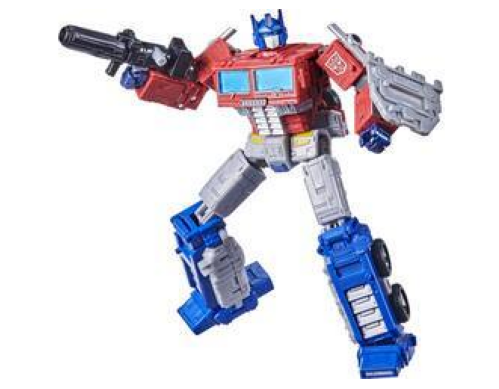

In [41]:
image = Image.open("images/optimusprime.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [42]:
import torch

texts = ["a photo of a transformer", "a photo of a robot", "a photo of agi"]
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.9515, 0.0443, 0.0041]])

## 다음 목적지는?